# Exercise: Datasets in Python

In the previous exercise, we loaded some data and fit a model to it. Several aspects of this were simplified, particularly that the data was hard-coded into our python script, and we didn't spend any time really looking at the data itself.

Here, we load data from a file, filter it, and graph it. Doing so is a very important first step in order to build proper models or to understand their limitations.

As before, there's no need to edit any code in this unit's examples. Try to read it, understand it, then press the **Run** button to run it. As always, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

## Load data with Pandas

There are various libraries that help you work with data. In Python, one of the most common libraries is *Pandas*. We used pandas briefly in the previous exercise. Pandas can open data saved as text files and store it in an organized table called a `DataFrame`.

Let's open some text data that's stored on disk. Our data is saved in a file called `doggy-boot-harness.csv`.


In [1]:
import requests

# URLs of the files to download
urls = [
    "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py",
    "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv"
]

# File names to save the downloaded content
file_names = [
    "graphing.py",
    "doggy-boot-harness.csv"
]

# Loop through the URLs and download the files
for url, file_name in zip(urls, file_names):
    print(f"Downloading {file_name}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"Downloaded {file_name} successfully!")
    else:
        print(f"Failed to download {file_name}. Status code: {response.status_code}")

Downloaded graphing.py successfully!
Downloaded doggy-boot-harness.csv successfully!


In [2]:
import pandas
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# Read the text file containing data using pandas
dataset = pandas.read_csv('doggy-boot-harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


As you can see, this dataset contains information about dogs, including their doggy boot size, harness size, sex, and age in years.

Data is stored as columns and rows, similar to a table you might see in Excel.

## Filter data by Columns

Data is easy to filter by columns. We can either type this directly, like `dataset.my_column_name`, or like so: `dataset["my_column_name"]`.

We can use this to either extract data, or to delete data.

Let's take a look at the harness sizes, and delete the `sex` and `age_years` columns. 

In [3]:

# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']



## Filter data by Rows

We can get data from the top of the table by using the `head()` function, or from the bottom of the table by using the `tail()` function. 

Both functions make a shallow copy of a section of our dataframe. Here, we're sending these copies to the `print()` function. We can also use the head and tail views for other purposes, such as for use in analyses or graphs.

In [4]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


We can also filter logically. For example, we can look at data for dogs who have a harness smaller than a size 55.

This works by calculating a `True` or `False` value for each row, then keeping only those rows where the value is `True`.

In [5]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means 
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

This looks like a lot of code, but we can compress the important parts into a single line.

Let's do something similar: restrict our data to only those with boot sizes smaller than 40. 

In [6]:
# Make a copy of the dataset that only contains dogs with 
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


## Graph Data

Graphing your data is often the easiest way to understand it. 

Lets make a simple graph of _harness size_ versus _boot size_ for our avalanche dogs with smaller feet. 

Text(0, 0.5, 'boot_size')

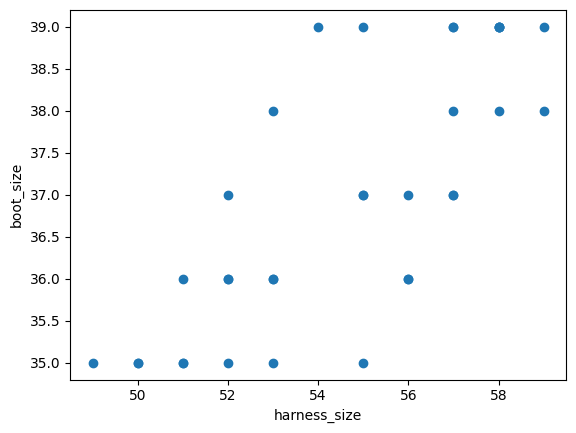

In [7]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt


# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# add labels
plt.xlabel("harness_size")
plt.ylabel("boot_size")

## Create New Columns

The preceding graph shows the relationship we want to investigate for our store, but some customers might want harness-size lists in inches, not centimeters. How can we view these harness sizes in imperial units?

To do this, we need to create a new column called `harness_size_imperial` and put that on the X axis instead.

Creating new columns uses very similar syntax to what we've seen before.

Text(0, 0.5, 'boot_size')

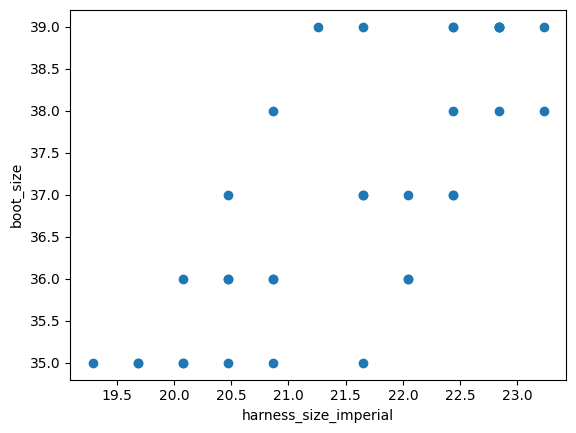

In [8]:
# Convert harness sizes from metric to imperial units 
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plt.scatter(data_smaller_paws["harness_size_imperial"], data_smaller_paws["boot_size"])
plt.xlabel("harness_size_imperial")
plt.ylabel("boot_size")

We've now graphed our new column of data (`harness_size_imperial`) against boot size for dogs with small paws.

## Summary

We've introduced working with data in Python, including:

* Opening data from a file into a `DataFrame` (table).
* Inspecting the top and bottom of the dataframe.
* Adding and removing columns of data.
* Removing rows of data based on certain criteria.
* Graphing data to understand trends.

Learning to work with dataframes can feel tedious or dry, but keep going, because these basic skills are critical to unlocking the exciting machine-learning techniques that we cover in later modules.